In [1]:
import numpy as np
import warnings
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from yahoo_fin import stock_info as si
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import talib as TA
from datetime import datetime
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
yf.pdr_override()

In [61]:
def plot_two_stocks(stock1, stock2):
    if '.prev' in stock1:
        stock1 = stock1.split('.prev')[0]
        print(stock1)
    #
    df1 = yf.download(stock1, start=start)
    df1['Date'] = df1.index
    df1['Date'] = df1['Date'].apply(mdates.date2num)
    df2 = yf.download(stock2, start=start)
    df2['Date'] = df2.index
    df2['Date'] = df2['Date'].apply(mdates.date2num)
    #
    ohlc_seq = ['Date', 'Open', 'High', 'Low', 'Close']
    fig = plt.figure(figsize = (15,20))
    # fig.suptitle('{}.HK {}'.format(label, start_date.year), fontsize=18)
    current_row = 0
    ax_height = 3
    ax0 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4)
    ax0.grid(True)
    candlestick_ohlc(ax0, df1[ohlc_seq].values, width=.4, colorup='#53c156', colordown='#ff1717')
    ax0.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax0.legend([stock1])
    #
    current_row = current_row + ax_height
    ax_height = 3
    ax1 = plt.subplot2grid((15,4), (current_row,0), rowspan=ax_height, colspan=4, sharex=ax0)
    ax1.grid(True)
    candlestick_ohlc(ax1, df2[ohlc_seq].values, width=.4, colorup='#53c156', colordown='#ff1717')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.legend([stock2])
    #
    prev_stock = '{}.prev'.format(stock1)
    now_stock = stock2
    compare_df = pd.concat([prevday_returns[prev_stock], today_returns[now_stock]], axis=1)
    print('Total prev stock rise {}'.format(compare_df[compare_df[prev_stock]<0].shape[0]))
    print('Total prev stock rise and today rise {}'.format(compare_df[(compare_df[prev_stock]<0) & (compare_df[now_stock]<0)].shape[0]))

In [3]:
num_of_years = 1
start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
end = dt.date.today()

In [4]:
# df = pd.read_csv('data/mktcap.csv', index_col=0)
# df = df[df['mktcap']>0]
#
# Use csv file from China
df = pd.read_csv('data/hk_stock_full.csv', header=None)
df = df.rename(columns={0: 'stock'})

In [5]:
df

stock
0     0001.HK
1     0002.HK
2     0003.HK
3     0004.HK
4     0005.HK
5     0006.HK
6     0007.HK
7     0008.HK
8     0009.HK
9     0010.HK
10    0011.HK
11    0012.HK
12    0014.HK
13    0016.HK
14    0017.HK
15    0018.HK
16    0019.HK
17    0021.HK
18    0022.HK
19    0023.HK
20    0024.HK
21    0025.HK
22    0026.HK
23    0027.HK
24    0028.HK
25    0029.HK
26    0030.HK
27    0031.HK
28    0033.HK
29    0034.HK
30    0035.HK
31    0036.HK
32    0037.HK
33    0038.HK
34    0039.HK
35    0040.HK
36    0041.HK
37    0042.HK
38    0043.HK
39    0045.HK
40    0046.HK
41    0047.HK
42    0048.HK
43    0050.HK
44    0051.HK
45    0052.HK
46    0053.HK
47    0056.HK
48    0057.HK
49    0058.HK
50    0059.HK
51    0060.HK
52    0061.HK
53    0062.HK
54    0063.HK
55    0064.HK
56    0065.HK
57    0066.HK
58    0068.HK
59    0069.HK
60    0070.HK
61    0071.HK
62    0072.HK
63    0073.HK
64    0075.HK
65    0076.HK
66    0077.HK
67    0078.HK
68    0080.HK
69    0081.HK
70    0082.HK
71    0083.HK
72    0084.HK
73    0085.HK
74    0086.HK
75    0087.HK
76    0088.HK
77    0089.HK
78    0090.HK
79    0091.HK
80    0092.HK
81    0093.HK
82    0094.HK
83    0095.HK
84    0096.HK
85    0097.HK
86    0098.HK
87    0099.HK
88    0100.HK
89    0101.HK
90    0102.HK
91    0103.HK
92    0104.HK
93    0105.HK
94    0106.HK
95    0107.HK
96    0108.HK
97    0109.HK
98    0110.HK
99    0111.HK
100   0112.HK
101   0113.HK
102   0114.HK
103   0115.HK
104   0116.HK
105   0117.HK
106   0118.HK
107   0119.HK
108   0120.HK
109   0122.HK
110   0123.HK
111   0124.HK
112   0125.HK
113   0126.HK
114   0127.HK
115   0128.HK
116   0129.HK
117   0130.HK
118   0131.HK
119   0132.HK
120   0133.HK
121   0135.HK
122   0136.HK
123   0137.HK
124   0138.HK
125   0139.HK
126   0141.HK
127   0142.HK
128   0143.HK
129   0144.HK
130   0146.HK
131   0147.HK
132   0148.HK
133   0149.HK
134   0150.HK
135   0151.HK
136   0152.HK
137   0153.HK
138   0155.HK
139   0156.HK
140   0157.HK
141   0158.HK
142   0159.HK
143   0160.HK
144   0162.HK
145   0163.HK
146   0164.HK
147   0165.HK
148   0166.HK
149   0167.HK
150   0168.HK
151   0169.HK
152   0171.HK
153   0172.HK
154   0173.HK
155   0174.HK
156   0175.HK
157   0176.HK
158   0177.HK
159   0178.HK
160   0179.HK
161   0180.HK
162   0181.HK
163   0182.HK
164   0183.HK
165   0184.HK
166   0185.HK
167   0186.HK
168   0187.HK
169   0188.HK
170   0190.HK
171   0191.HK
172   0193.HK
173   0194.HK
174   0195.HK
175   0196.HK
176   0197.HK
177   0198.HK
178   0199.HK
179   0200.HK
180   0201.HK
181   0202.HK
182   0204.HK
183   0205.HK
184   0206.HK
185   0207.HK
186   0208.HK
187   0209.HK
188   0210.HK
189   0211.HK
190   0212.HK
191   0213.HK
192   0214.HK
193   0215.HK
194   0216.HK
195   0217.HK
196   0218.HK
197   0219.HK
198   0220.HK
199   0222.HK
200   0223.HK
201   0224.HK
202   0225.HK
203   0226.HK
204   0227.HK
205   0228.HK
206   0229.HK
207   0230.HK
208   0231.HK
209   0232.HK
210   0234.HK
211   0235.HK
212   0236.HK
213   0237.HK
214   0238.HK
215   0239.HK
216   0240.HK
217   0241.HK
218   0242.HK
219   0243.HK
220   0244.HK
221   0245.HK
222   0247.HK
223   0248.HK
224   0250.HK
225   0251.HK
226   0252.HK
227   0253.HK
228   0254.HK
229   0255.HK
230   0256.HK
231   0257.HK
232   0258.HK
233   0259.HK
234   0260.HK
235   0261.HK
236   0262.HK
237   0263.HK
238   0264.HK
239   0265.HK
240   0266.HK
241   0267.HK
242   0268.HK
243   0269.HK
244   0270.HK
245   0271.HK
246   0272.HK
247   0273.HK
248   0274.HK
249   0275.HK
250   0276.HK
251   0277.HK
252   0278.HK
253   0279.HK
254   0280.HK
255   0281.HK
256   0282.HK
257   0285.HK
258   0286.HK
259   0287.HK
260   0288.HK
261   0289.HK
262   0290.HK
263   0291.HK
264   0292.HK
265   0293.HK
266   0294.HK
267   0295.HK
268   0296.HK
269   0298.HK
270   0299.HK
271   0302.HK
272   0303.HK
273   0305.HK
274   0306.HK
275   0307.HK
276   0308.HK
277   0310.HK
278   0311.HK
279   0312.HK
280   0313.HK
281   0315.HK
282   0316.HK
283   0317.HK
284   0318.HK
285 

In [10]:
def stock_begin_timegap(stock):
    num_of_years = 1
    start = dt.date.today() - dt.timedelta(days = int(365.25*num_of_years))
    try:
        df = yf.download(stock, start=start)
        stock_start = df.index[0]
        coeff_var = df['Close'].std() / df['Close'].mean()
        return np.array(((stock_start - pd.to_datetime(start)).days, coeff_var))
    except:
        return np.array((10000, 10000))

In [11]:
%%time
df['gap'], df['coeff_var'] = zip(*df['stock'].apply(stock_begin_timegap))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2906.HK: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 2959.HK: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [12]:
df

stock      gap           std     coeff_var
0     0001.HK      0.0      9.684769      0.168952
1     0002.HK      0.0      4.027253      0.052089
2     0003.HK      0.0      1.343735      0.105771
3     0004.HK      0.0      2.404466      0.147940
4     0005.HK      0.0     10.499484      0.245187
5     0006.HK      0.0      6.303484      0.131223
6     0007.HK      0.0      0.218734      0.328426
7     0008.HK      0.0      0.197953      0.042893
8     0009.HK      0.0      0.033020      0.345798
9     0010.HK      0.0      1.515014      0.082380
10    0011.HK      0.0     17.056210      0.124514
11    0012.HK      0.0      3.572343      0.111350
12    0014.HK      0.0      2.854920      0.110085
13    0016.HK      0.0      7.843053      0.075289
14    0017.HK      0.0      2.874926      0.074790
15    0018.HK      0.0      0.059411      0.127559
16    0019.HK      0.0     13.732128      0.265037
17    0021.HK      0.0      0.014489      0.140051
18    0022.HK      0.0      0.023564      0.179479
19    0023.HK      0.0      1.263254      0.075122
20    0024.HK      0.0      0.000000      0.000000
21    0025.HK      0.0      0.782811      0.076989
22    0026.HK      0.0     10.669063      0.101466
23    0027.HK      0.0      4.795325      0.089210
24    0028.HK      0.0      0.456979      0.126597
25    0029.HK      0.0      1.704078      0.138401
26    0030.HK      0.0      0.037889      0.134090
27    0031.HK      0.0      0.042414      0.095347
28    0033.HK      0.0      0.033142      0.299973
29    0034.HK      0.0      0.687964      0.077311
30    0035.HK      0.0      0.539411      0.193478
31    0036.HK      0.0      0.032475      0.205666
32    0037.HK      0.0      0.033715      0.227193
33    0038.HK      0.0      0.631684      0.291148
34    0039.HK      0.0      0.013427      0.191081
35    0040.HK      0.0      0.096674      0.143105
36    0041.HK      0.0      2.983228      0.139593
37    0042.HK      0.0      0.049756      0.106110
38    0043.HK      0.0      0.055878      0.080907
39    0045.HK      0.0      0.960463      0.134837
40    0046.HK      0.0      0.412893      0.164383
41    0047.HK      0.0      0.018838      0.255032
42    0048.HK      0.0      0.268822      0.515801
43    0050.HK      0.0      0.413270      0.065464
44    0051.HK      0.0      1.695388      0.189553
45    0052.HK      0.0      1.419316      0.078165
46    0053.HK      0.0     12.514617      0.111782
47    0056.HK      0.0      0.218144      0.129060
48    0057.HK      0.0      0.211247      0.109292
49    0058.HK      0.0      0.013536      0.165912
50    0059.HK      0.0      0.019997      0.019684
51    0060.HK      0.0      0.091059      0.135378
52    0061.HK      0.0      0.168006      0.484488
53    0062.HK      0.0      2.338020      0.140624
54    0063.HK      0.0      0.027642      0.158977
55    0064.HK      0.0      0.034440      0.205207
56    0065.HK      0.0      0.058599      0.264426
57    0066.HK      0.0      2.607157      0.062688
58    0068.HK      0.0      0.933150      0.411991
59    0069.HK      0.0      0.823220      0.122060
60    0070.HK      0.0      0.028961      0.278568
61    0071.HK      0.0      0.965119      0.069925
62    0072.HK      0.0      0.051048      0.244670
63    0073.HK      0.0      0.148433      0.285174
64    0075.HK      0.0      0.069827      0.032335
65    0076.HK      0.0      0.014689      0.641001
66    0077.HK      0.0      0.095035      0.129274
67    0078.HK      0.0      0.479543      0.143028
68    0080.HK      0.0      0.031402      0.164979
69    0081.HK      0.0      0.449682      0.092646
70    0082.HK      0.0      0.042832      0.211219
71    0083.HK      0.0      0.848745      0.084098
72    0084.HK      0.0      0.018235      0.201031
73    0085.HK      0.0      0.144957      0.197133
74    0086.HK      0.0      0.257095      0.079732
75    0087.HK      0.0      1.928616      0.223811
76    0088.HK      0.0      0.617971      0.116309
77    0089.HK      0.0      0.

In [15]:
stock_df = df[(df['gap']<=5) & (df['coeff_var']<1000)]

In [16]:
stock_df.count()

stock        2172
gap          2172
std          2172
coeff_var    2172
dtype: int64

In [17]:
stock_df.describe()

gap          std    coeff_var
count  2172.000000  2172.000000  2172.000000
mean     -0.009669     0.878918     0.208375
std       0.137083     3.764588     0.150823
min      -1.000000     0.000000     0.000000
25%       0.000000     0.038399     0.115036
50%       0.000000     0.121070     0.170290
75%       0.000000     0.446753     0.252301
max       4.000000    79.860625     1.305210

In [28]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2305
Data columns (total 4 columns):
stock        2172 non-null object
gap          2172 non-null float64
std          2172 non-null float64
coeff_var    2172 non-null float64
dtypes: float64(3), object(1)
memory usage: 164.8+ KB


In [33]:
stock_df = stock_df[stock_df['coeff_var']<=stock_df['coeff_var'].mean()]

In [34]:
stock_df.to_csv('data/stock_qualified.csv')

### Find correlation

In [35]:
stock_df = pd.read_csv('data/stock_qualified.csv', index_col=0)

In [36]:
%%time
tickers = stock_df['stock'].to_list()
dataset = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  1398 of 1398 completed
CPU times: user 1min 29s, sys: 12.2 s, total: 1min 41s
Wall time: 2min 14s


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2019-11-21 to 2020-11-20
Columns: 1398 entries, 0001.HK to 9988.HK
dtypes: float64(1398)
memory usage: 2.7 MB


In [38]:
dataset.to_csv('data/all_stock_close.csv')

In [39]:
dataset.head(3)

0001.HK    0002.HK    0003.HK    0004.HK    0006.HK   0008.HK  \
Date                                                                          
2019-11-21        NaN        NaN        NaN        NaN        NaN       NaN   
2019-11-22  67.963409  76.052124  13.894835  18.090796  52.005646  4.286833   
2019-11-25  68.058136  76.621101  13.987528  18.090796  52.760033  4.352210   

              0010.HK     0011.HK    0012.HK    0014.HK  ...  8535.HK  \
Date                                                     ...            
2019-11-21        NaN         NaN        NaN        NaN  ...      NaN   
2019-11-22  18.589355  153.497543  35.732788  27.409407  ...    0.085   
2019-11-25  18.920959  155.502167  36.346428  27.551668  ...    0.085   

            8601.HK  8607.HK  8609.HK  8613.HK  8622.HK   8635.HK  8668.HK  \
Date                                                                         
2019-11-21      NaN      NaN      NaN      NaN      NaN       NaN      NaN   
2019-11-22    0.224    0.295    0.165    0.068     0.15  0.122253    0.161   
2019-11-25    0.224    0.300    0.168    0.068     0.15  0.119319    0.164   

            9900.HK  9988.HK  
Date                          
2019-11-21      NaN      NaN  
2019-11-22     1.44      NaN  
2019-11-25     1.44      NaN  

[3 rows x 1398 columns]

### Use close on all stocks to compile result

In [41]:
dataset = pd.read_csv('data/all_stock_close.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', drop=True, inplace=True)

### analyze shift

In [ ]:
dataset['0001.HK'].head(5)

In [ ]:
dataset['0001.HK'].shift(1).head(5)

In [ ]:
dataset['0001.HK'].shift(2).head(5)

In [ ]:
print('Rise {}  Drop {}  NoChange {}'.format(np.log(0.9), np.log(1.1), np.log(1)))

### prevday and today

In [42]:
prevday_returns = np.log(dataset.shift(1)/dataset.shift(2))
today_returns = np.log(dataset/dataset.shift(1))

In [43]:
stocks_prev = prevday_returns.columns.to_list()
stocks_today = today_returns.columns.to_list()

In [44]:
new_col = ['{}.prev'.format(c) for c in stocks_prev]
prevday_returns.columns = new_col

In [45]:
comb_df = pd.concat([prevday_returns, today_returns], axis=1)

In [46]:
%%time
print('\nCorrelation Matrix')
corr_matrix = comb_df.corr()
# print(corr_matrix)


Correlation Matrix
CPU times: user 3.46 s, sys: 0 ns, total: 3.46 s
Wall time: 3.45 s


In [47]:
corr_matrix_corrected = corr_matrix.loc[new_col, stocks_today]

### What to drop

In [48]:
sorted_corr = corr_matrix_corrected.abs().unstack().sort_values(ascending=False)
sorted_corr.shape

(1954404,)

In [49]:
sorted_corr.head(10)

6898.HK  1216.HK.prev    0.751255
1216.HK  1371.HK.prev    0.689950
1738.HK  8149.HK.prev    0.643948
0521.HK  2300.HK.prev    0.639413
0096.HK  0676.HK.prev    0.615578
3869.HK  0655.HK.prev    0.582817
2139.HK  0100.HK.prev    0.579733
1371.HK  2181.HK.prev    0.577095
0403.HK  8137.HK.prev    0.551708
1160.HK  1522.HK.prev    0.539175
dtype: float64

### Analyze the top pair

In [50]:
comb_df['1216.HK.prev'].corr(comb_df['6898.HK'])

0.7512552686857967

0.7512552686857967
1216.HK
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Total prev stock rise 78
Total prev stock rise and today rise 22


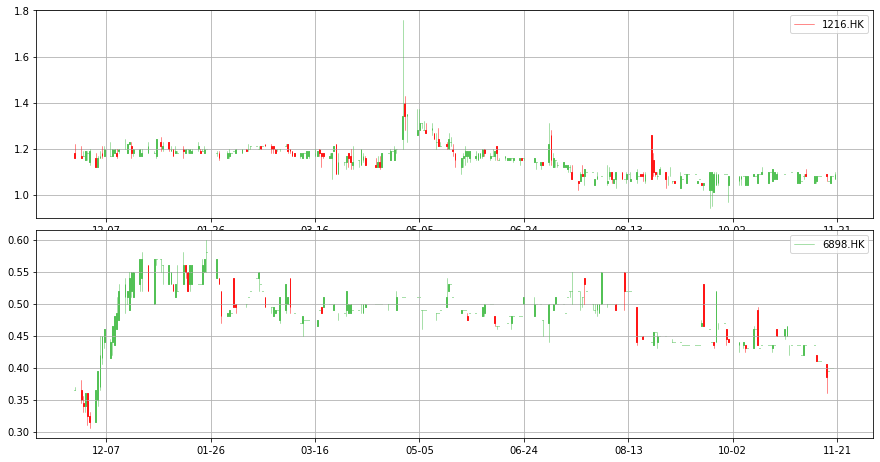

In [62]:
stock1 = '1216.HK.prev'
stock2 = '6898.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2)

### Grapth the top correlation pair

In [55]:
stock1 = '0056.HK.prev'
stock2 = '1315.HK'
#
print(comb_df[stock1].corr(comb_df[stock2]))
plot_two_stocks(stock1, stock2)

KeyError: '1315.HK'